Gender: Female
Age: 25-32 years


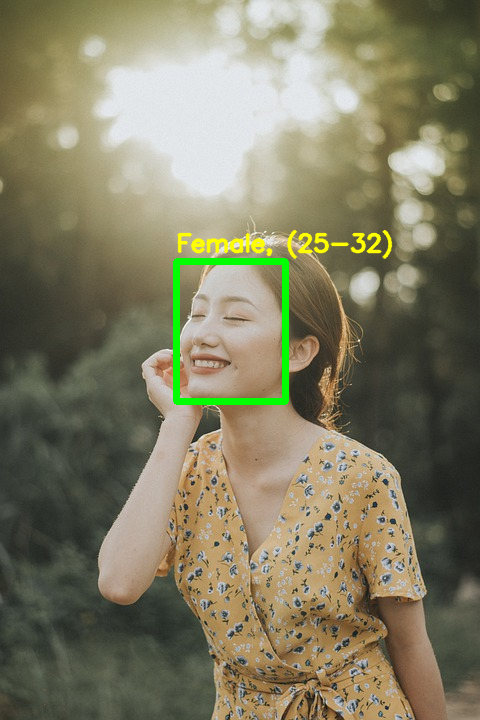

Gender: Female
Age: 8-12 years


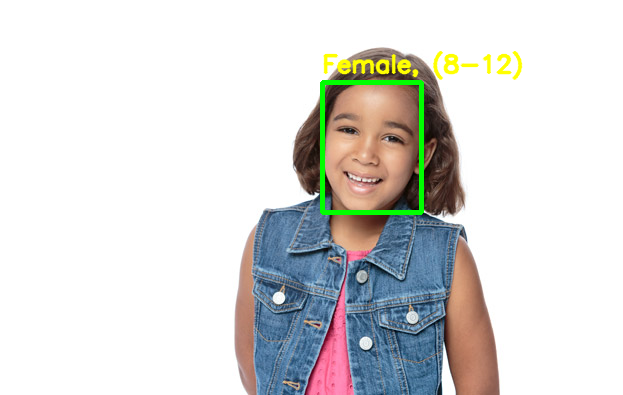

Gender: Male
Age: 4-6 years


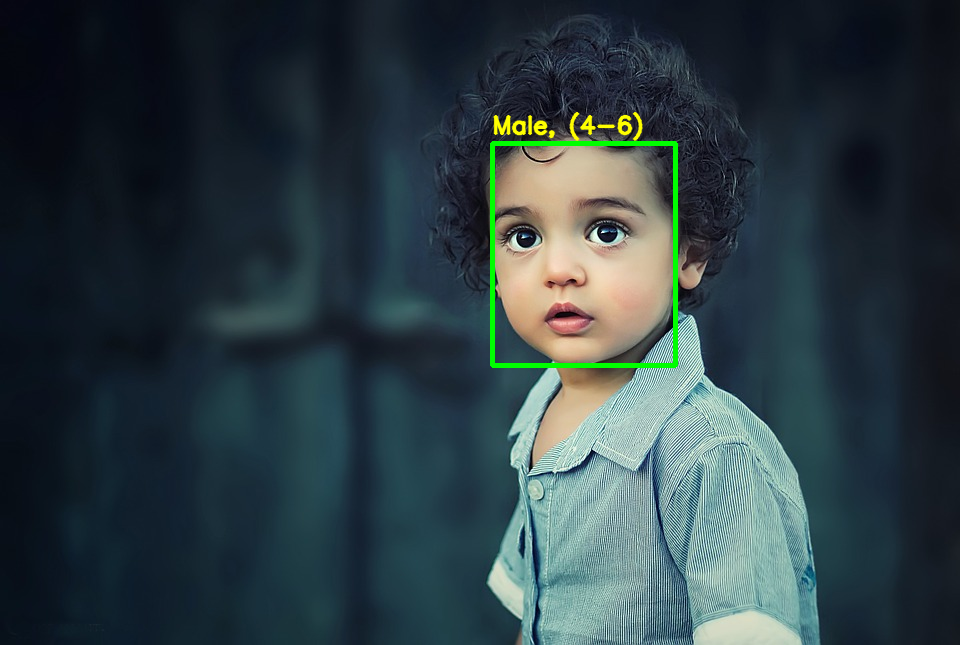

In [15]:
# Gender & Age Detection Program

import cv2
from google.colab.patches import cv2_imshow

def highlight_face(net, frame, conf_threshold=0.7):
    frame_opencv_dnn = frame.copy()
    frame_height = frame_opencv_dnn.shape[0]
    frame_width = frame_opencv_dnn.shape[1]
    blob = cv2.dnn.blobFromImage(frame_opencv_dnn, 1.0, (300, 300), [104, 117, 123], True, False)

    net.setInput(blob)
    detections = net.forward()
    face_boxes = []

    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]

        if confidence > conf_threshold:
            x1 = int(detections[0, 0, i, 3] * frame_width)
            y1 = int(detections[0, 0, i, 4] * frame_height)
            x2 = int(detections[0, 0, i, 5] * frame_width)
            y2 = int(detections[0, 0, i, 6] * frame_height)
            face_boxes.append([x1, y1, x2, y2])
            cv2.rectangle(frame_opencv_dnn, (x1, y1), (x2, y2), (0, 255, 0), int(round(frame_height / 150)), 8)

    return frame_opencv_dnn, face_boxes


# Specify the paths to your images here
image_paths = ["/content/girl1.jpg", "/content/girl2.jpg", "/content/kid1.jpg"]

face_proto = "opencv_face_detector.pbtxt"
face_model = "opencv_face_detector_uint8.pb"
age_proto = "age_deploy.prototxt"
age_model = "age_net.caffemodel"
gender_proto = "gender_deploy.prototxt"
gender_model = "gender_net.caffemodel"

MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)
age_list = ['(0-2)', '(4-6)', '(8-12)', '(15-20)', '(25-32)', '(38-43)', '(48-53)', '(60-100)']
gender_list = ['Male', 'Female']

face_net = cv2.dnn.readNet(face_model, face_proto)
age_net = cv2.dnn.readNet(age_model, age_proto)
gender_net = cv2.dnn.readNet(gender_model, gender_proto)

for image_path in image_paths:
    frame = cv2.imread(image_path)

    padding = 20

    result_img, face_boxes = highlight_face(face_net, frame)

    if not face_boxes:
        print(f"No face detected in {image_path}")
        continue

    for face_box in face_boxes:
        face = frame[max(0, face_box[1] - padding):min(face_box[3] + padding, frame.shape[0] - 1),
               max(0, face_box[0] - padding):min(face_box[2] + padding, frame.shape[1] - 1)]

        blob = cv2.dnn.blobFromImage(face, 1.0, (227, 227), MODEL_MEAN_VALUES, swapRB=False)
        gender_net.setInput(blob)
        gender_preds = gender_net.forward()
        gender = gender_list[gender_preds[0].argmax()]
        print(f'Gender: {gender}')

        age_net.setInput(blob)
        age_preds = age_net.forward()
        age = age_list[age_preds[0].argmax()]
        print(f'Age: {age[1:-1]} years')

        cv2.putText(result_img, f'{gender}, {age}', (face_box[0], face_box[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8,
                    (0, 255, 255), 2, cv2.LINE_AA)

    # Display the result image
    cv2_imshow(result_img)
